### Loading packages and dataset

In [3]:
using CSV
using DataFrames
using LinearAlgebra
using Statistics
using Distributions
using Printf
using Plots
using StatsBase
using Optim

In [35]:
equity_df = CSV.read("Equity_Data.csv", DataFrame)
delete!(equity_df, 1)

for col in names(equity_df[:,2:end])
    if eltype(equity_df[!, col]) <: AbstractString
        equity_df[!, col] = parse.(Float64, equity_df[!, col])
    else
        equity_df[!, col] = float.(equity_df[!, col])
    end
end

first(equity_df,10)

,Column1,JPM,XOM,PG,D,VZ,EQR,NEM,AAPL
,String15,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,01/04/2013,35.9398,59.3551,58.0594,39.2554,30.6101,33.9766,33.4842,13.2301
2,02/04/2013,36.278,59.2309,59.0009,39.5455,30.7842,33.9643,32.2222,13.2572
3,03/04/2013,35.4236,58.8058,58.3732,39.6332,30.467,34.209,31.122,13.3251
4,04/04/2013,35.9075,58.7012,58.687,40.1324,30.6598,35.1815,31.6478,13.1933
5,05/04/2013,36.2251,58.2042,58.4554,40.2268,30.8215,35.4017,31.8501,13.0539
6,08/04/2013,36.7317,57.9362,58.8738,40.5237,31.0635,35.4812,31.5588,13.1468
7,09/04/2013,36.8073,58.0473,58.4778,40.3753,31.0195,35.6647,32.384,13.1705
8,10/04/2013,37.2382,57.9885,59.2101,40.5911,31.3337,35.6891,31.5427,13.4392
9,11/04/2013,37.2836,58.3416,59.5314,40.4697,31.7422,36.0989,31.2676,13.3972


In [95]:
log_returns = log.(equity_df[2:end, 2:end] ./ equity_df[1:end-1, 2:end]);

In [94]:
returns = (equity_df[2:end, 2:end].-equity_df[1:end-1, 2:end]) ./ equity_df[1:end-1, 2:end];

In [209]:
#Transforming the dataframe into matrix for easy computation
equity_m = Matrix(returns[:,:]);

In [600]:
#Taking the GMVP weights of the portfolio
weights = [0.0577904083898541,0.0300539690674567,0.168939416454578,0.0300370127300522,0.0300364293423991,0.0300421028309489,0.078344871683216,0.199979627370973,0.030075270655722,0.171161352080672,0.173539539394126];

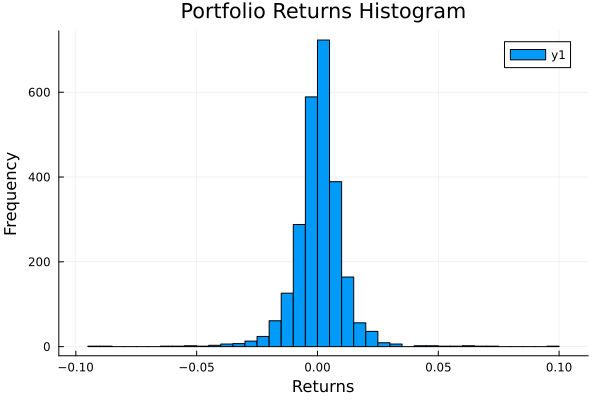

In [601]:
portfolio_returns = equity_m * weights  # multiply each column of returns by weights

histogram(portfolio_returns, bins=80, xlabel="Returns", ylabel="Frequency", title="Portfolio Returns Histogram")

# IMPORTED RETURNS

# Equity

In [1250]:
equity_df = CSV.read("Equity_Data_Returns.csv", DataFrame)
#delete!(equity_df, 1)

for col in names(equity_df[:,2:end])
    if eltype(equity_df[!, col]) <: AbstractString
        equity_df[!, col] = parse.(Float64, equity_df[!, col])
    else
        equity_df[!, col] = float.(equity_df[!, col])
    end
end

first(equity_df,10)

equity_m = Matrix(equity_df[1:end,2:end]);

In [1251]:
weights = [0.0577904083898541,0.0300539690674567,0.168939416454578,0.0300370127300522,0.0300364293423991,0.0300421028309489,0.078344871683216,0.199979627370973,0.030075270655722,0.171161352080672,0.173539539394126];

#weights = [0.03,0.04,0.20,0.09,0.20,0.04,0.09,0.04,0.03,0.20,0.04];


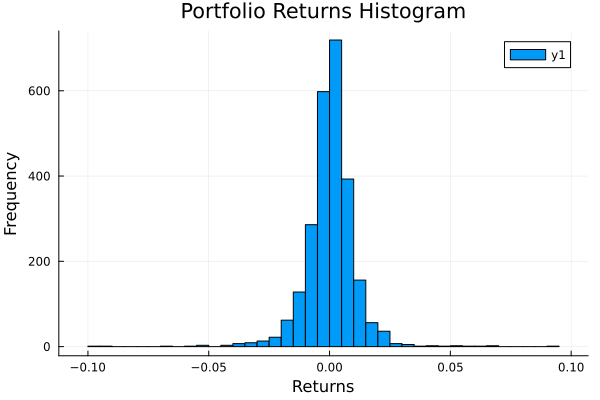

In [1252]:
portfolio_returns_equity = equity_m * weights  # multiply each column of returns by weights

histogram(portfolio_returns_equity, bins=80, xlabel="Returns", ylabel="Frequency", title="Portfolio Returns Histogram")

In [1253]:
# calculate skewness and kurtosis
skewness_value = skewness(portfolio_returns_equity);
kurtosis_value = kurtosis(portfolio_returns_equity) + 3;
excess_kurtosis = kurtosis(portfolio_returns_equity);
dof = (6 / excess_kurtosis) + 4

#Calculate the expected portfolio returns, variance and standard deviation
portfolio_expected_return = mean(equity_m * weights);
portfolio_variance = weights' * cov(equity_m) * weights;
portfolio_std = sqrt(portfolio_variance);

# Bond

In [1254]:
equity_df = CSV.read("Bond_Returns.csv", DataFrame)
#delete!(equity_df, 1)

for col in names(equity_df[:,2:end])
    if eltype(equity_df[!, col]) <: AbstractString
        equity_df[!, col] = parse.(Float64, equity_df[!, col])
    else
        equity_df[!, col] = float.(equity_df[!, col])
    end
end

first(equity_df,10)

equity_m = Matrix(equity_df[1:end,2:end]);

In [1255]:
weights = [0.397497683209609,0.0300903709059041,0.156446663013634,0.0301661590795009,0.385799123791351];

#weights = [0.6,0.03,0.31,0.03,0.3];

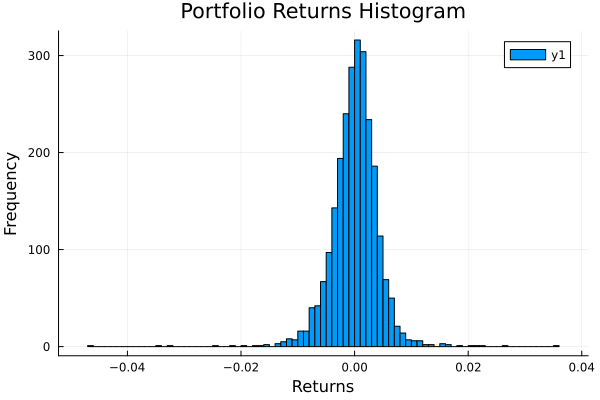

In [1256]:
portfolio_returns_bond = equity_m * weights  # multiply each column of returns by weights

histogram(portfolio_returns_bond, bins=80, xlabel="Returns", ylabel="Frequency", title="Portfolio Returns Histogram")

# Equity + Bond

In [1257]:
println(size(portfolio_returns_equity))
println(size(portfolio_returns_bond))

(2518,)
(2518,)


In [1258]:
portfolio_returns = portfolio_returns_equity * 0.6 + portfolio_returns_bond * 0.4;

### Normal and T Distribution Risk Estimates

In [815]:
#Calculating the Normal VaR at the 99% confidence level
alpha = 0.01;
NVaR = - portfolio_expected_return - sqrt(portfolio_variance) * quantile(Normal(0, 1), alpha)
NVaR_Value = (NVaR ./ 100) * 1000000 

235.15272062326926

In [816]:
# Calculating the Student's t VaR at the 99% confidence level
alpha = 0.01
dof = size(equity_m, 1) - 1
t_dist = TDist(dof)
t_var = - portfolio_expected_return - sqrt(portfolio_variance) * quantile(t_dist, alpha)
TVaR_Value = (t_var./100) * 1e6

235.30577145834067

In [817]:
print("Normal VaR: ", NVaR_Value);
print("\nStudent's T VaR: ", TVaR_Value);

Normal VaR: 235.15272062326926
Student's T VaR: 235.30577145834067

In [818]:
alpha = 0.01;
q = quantile(Normal(0, 1), alpha);
Normal_ES = - portfolio_expected_return + sqrt(portfolio_variance) * (pdf(Normal(0, 1), q) / (alpha));

In [819]:
# define significance level
alpha = 0.01

# find (1-alpha)-th percentile of Student t distribution with nu degrees of freedom
t_alpha_nu = quantile(TDist(dof), alpha)

# calculate expected shortfall
T_ES = -portfolio_expected_return - t_alpha_nu * sqrt(portfolio_variance) * sqrt((dof-2)/dof);

In [820]:
print("Normal ES: ", Normal_ES);
print("\nStudent's T ES: ", T_ES);

Normal ES: 0.027013770088182235
Student's T ES: 0.02352102705288671

## Backtesting Normal and T Var

In [1118]:
function backtest_normal_var(returns, rolling_window_size, horizon, alpha)
    exceedings = 0
    first_index = 1
    number_of_returns = size(portfolio_returns)[1]
    
    while rolling_window_size<number_of_returns
        window_returns = returns[first_index:rolling_window_size]
        
        #### Insert risk measurement method here, label the risk measure as risk_measure
        #########################
        
        # Call risk measurement(window_returns, lambda,alpha.....)
        portfolio_expected_return = mean(window_returns);
        portfolio_variance = var(window_returns);
        portfolio_std = sqrt(portfolio_variance);
        
        risk_measure = - portfolio_expected_return - sqrt(portfolio_variance) * quantile(Normal(0, 1), alpha)
        
        NVaR_Value = (risk_measure ./ 100) * 1000000
        #########################
        
        # Check for exceeding
        #println((risk_measure ./ 100) * 1000000)
        #println((returns[rolling_window_size+1]./ 100) * 1000000)
        #if (risk_measure./100) * 1000000 < (returns[rolling_window_size+1]./100) * 1000000
        if (returns[rolling_window_size+1]) < -risk_measure
            exceedings = exceedings+1
        end
        
        #Roll the window
        rolling_window_size = rolling_window_size + 1
        first_index = first_index + 1
    end
    
    
    return exceedings, number_of_returns
end;

In [1119]:
function backtest_t_var(returns, rolling_window_size, horizon, alpha)
    exceedings = 0
    first_index = 1
    number_of_returns = size(portfolio_returns)[1]
    
    while rolling_window_size<number_of_returns
        window_returns = returns[first_index:rolling_window_size]
        
        #### Insert risk measurement method here, label the risk measure 
        portfolio_expected_return = mean(window_returns);
        portfolio_variance = var(window_returns);
        portfolio_std = sqrt(portfolio_variance);
        
        # calculate skewness and kurtosis
        skewness_value = skewness(window_returns);
        kurtosis_value = kurtosis(window_returns) + 3;
        excess_kurtosis = kurtosis(window_returns);
        degrees_of_freedom = (6 / excess_kurtosis) + 4 
        
        t_dist = TDist(dof)
        risk_measure = - portfolio_expected_return - sqrt(portfolio_variance) * quantile(t_dist, alpha)
        TVaR_Value = (risk_measure./100) * 1e6
        ####
        
        # Check for exceeding
        #if (risk_measure./100) * 1000000 < (returns[rolling_window_size+1]./ 100) * 1000000
        if (returns[rolling_window_size+1]) < -risk_measure
            exceedings = exceedings+1
        end
        
        #Roll the window
        rolling_window_size = rolling_window_size + 1
        first_index = first_index + 1
    end
    return exceedings, number_of_returns
end;

In [1335]:
alpha = 0.01
rolling_window_size = 252*6
horizon = 1;

alpha*size(portfolio_returns)[1]

25.18

In [1412]:
alpha=0.01
ne, n = backtest_normal_var(portfolio_returns, rolling_window_size, horizon, alpha)

(34, 2518)

In [1413]:
p = binomial_probability(n,ne,alpha)*100

P = 0.0168407899
alpha = 0.05

Reject the null hypothesis


1.68407899

In [1414]:
alpha=0.01
ne, n = backtest_t_var(portfolio_returns, rolling_window_size, horizon, alpha)

(9, 2518)

In [1415]:
p = binomial_probability(n,ne,alpha)*100

P = 0.000123659
alpha = 0.05

Reject the null hypothesis


0.0123659

### Statistical Tests: Binomial Probability Test

The null hypothesis is that the probability of exceedances is equal to $\alpha$

$P = Choose(n,n_e)\alpha^{n_e}(1-\alpha)^{n-n_e}$

In [1276]:
function binomial_probability(a,b,alpha)
    p = round((Float64(binomial(BigInt(a),BigInt(b))*(alpha^(b))*((1-alpha)^(a-b)))),digits=10)
    alpha=0.05
    if p == alpha
        println("P = ",p)
        println("alpha = ",alpha,"\n")
        println("Accept the null hypothesis") 
    end

    if p < alpha
        println("P = ",p)
        println("alpha = ",alpha,"\n")
        println("Reject the null hypothesis")
    end

    if p > alpha
        println("P = ",p)
        println("alpha = ",alpha,"\n")
        println("Fail to reject the null hypothesis")
    end
    alpha=0.01
    return p
end

binomial_probability (generic function with 1 method)

In [1277]:
p = binomial_probability(n,ne,alpha)

P = 0.0
alpha = 0.05

Reject the null hypothesis


0.0

### Cornish Fisher Approximation

In [830]:
alpha = 0.01;
q = quantile(Normal(0, 1), alpha);

In [831]:
CF_VaR = -portfolio_expected_return-sqrt(portfolio_variance)*(q+(skewness_value/6)*((q^2) - 1)+(kurtosis_value/24)*q*((q^2)-3)-((skewness_value^2)/36)*q*(2*(q^2)-5));
CF_VaR = CF_VaR / 100
CF_VaR_value = CF_VaR * 1000000

723.2514809541075

In [832]:
print("Cornish Fisher Approximation: ", CF_VaR_value);

Cornish Fisher Approximation: 723.2514809541075

In [833]:
skewness_value

-0.525266925554322

In [1115]:
function backtest_cornish_fisher(returns, rolling_window_size, horizon, alpha)
    exceedings = 0
    first_index = 1
    number_of_returns = size(portfolio_returns)[1]
    
    while rolling_window_size<number_of_returns
        window_returns = returns[first_index:rolling_window_size]
        
        #### Insert risk measurement method here, label the risk measure 
        portfolio_expected_return = mean(window_returns);
        portfolio_variance = var(window_returns);
        portfolio_std = sqrt(portfolio_variance);
        
        # calculate skewness and kurtosis
        skewness_value = skewness(window_returns);
        kurtosis_value = kurtosis(window_returns) + 3;
        excess_kurtosis = kurtosis(window_returns);
        degrees_of_freedom = (6 / excess_kurtosis) + 4 
        
        q = quantile(Normal(0, 1), alpha);
        
        risk_measure = -portfolio_expected_return-sqrt(portfolio_variance)*(q+(skewness_value/6)*((q^2) - 1)+(kurtosis_value/24)*q*((q^2)-3)-((skewness_value^2)/36)*q*(2*(q^2)-5));
        CF_VaR = risk_measure / 100
        CF_VaR = CF_VaR * 1000000
        ####
        
        # Check for exceeding
        #if risk_measure < returns[rolling_window_size+1]
        if (returns[rolling_window_size+1]) < -risk_measure
            exceedings = exceedings+1
        end
        
        #Roll the window
        rolling_window_size = rolling_window_size + 1
        first_index = first_index + 1
    end
    return exceedings, number_of_returns
end;

In [1394]:
ne, n = backtest_cornish_fisher(portfolio_returns, rolling_window_size, horizon, alpha)

(6, 2518)

In [1395]:
p = binomial_probability(n,ne,alpha)*100

P = 3.8196e-6
alpha = 0.05

Reject the null hypothesis


0.00038196

### Extreme value theory

In [837]:
using Distributions, StatsBase, Optim

function pareto_negloglik(θ::Vector{Float64}, X::Vector{Float64})
    α, μ = θ
    if any(x <= μ for x in X)
        return Inf
    end
    n = length(X)
    -n*log(α) - n*log(μ) - (α + 1)*sum(log.(X .- μ))
end


function EVT_Var(returns::Vector{Float64}, alpha::Float64, threshold::Float64)
    x = sort(returns, rev=true)
    n = length(x)
    k = Int(floor(alpha*n))
    threshold = x[k]
    X = x[1:k] .- threshold
    mle = optimize(θ -> pareto_negloglik(θ, X), [1.0, mean(X) + 1], method=NelderMead())
    μ_mle, α_mle = mle.minimizer
    VaR = threshold + μ_mle/α_mle*((n/k*(1-alpha))^(-α_mle) - 1)
    return VaR
end



EVT_Var (generic function with 1 method)

In [838]:
# returns = randn(2518)
alpha = 0.01
threshold = quantile(portfolio_returns, 1-alpha)
VaR_EVT = EVT_Var(portfolio_returns, alpha, threshold)
VaR_EVT_Value = (VaR_EVT / 100) * 1000000
print("Value at Risk using EVT: ", VaR_EVT_Value)

Value at Risk using EVT: -9648.247702089291

In [1109]:
function backtest_EVT(returns, rolling_window_size, horizon, alpha)
    exceedings = 0
    first_index = 1
    number_of_returns = size(portfolio_returns)[1]
    
    while rolling_window_size<number_of_returns
        window_returns = returns[first_index:rolling_window_size]
        
        #### Insert risk measurement method here, label the risk measure 
        portfolio_expected_return = mean(window_returns);
        portfolio_variance = var(window_returns);
        portfolio_std = sqrt(portfolio_variance);
        
        threshold = quantile(window_returns, 1-alpha)
        risk_measure = EVT_Var(window_returns, alpha, threshold)
        VaR_EVT_Value = (risk_measure/ 100) * 1000000
        ####
        
        # Check for exceeding
        #println(-risk_measure/100 )
        #println(returns[rolling_window_size+1])
        #if -risk_measure/100 < returns[rolling_window_size+1]
        if (returns[rolling_window_size+1]) < risk_measure/100
            exceedings = exceedings+1
        end
        
        #Roll the window
        rolling_window_size = rolling_window_size + 1
        first_index = first_index + 1
    end
    return exceedings, number_of_returns
end;

In [1396]:
alpha=0.01
ne , n = backtest_EVT(portfolio_returns, rolling_window_size, horizon, alpha)

(34, 2518)

In [1397]:
p = binomial_probability(n,ne,alpha)

P = 0.0168407899
alpha = 0.05

Reject the null hypothesis


0.0168407899

# Spectral Risk Measure

$SRM(\lambda) = \frac{1}{\lambda}* ln(E(e^{-\lambda*r}))$

In [953]:
function loss(returns, alpha)
    portfolio_expected_return = mean(returns);
    portfolio_variance = var(returns);
    VaR = - portfolio_expected_return - sqrt(portfolio_variance) * quantile(Normal(0, 1), alpha)
    return VaR
end;

function measure(k,alpha)
    return (k/(1-exp(-k)))*(exp(-k*(1-alpha)))
end;

In [954]:
using QuadGK

function spectral_risk_integral(returns, k)
    integrand(alpha) = measure(k,alpha)*loss(returns,alpha)
    integral, _ = quadgk(integrand, 0, 1)
    return integral
end

spectral_risk_integral (generic function with 1 method)

In [857]:
function phi(i, lambda)
    return -(1/lambda)*log(mean(exp(-lambda*i)))
end;

function phi_i(i, N,lambda)
    normaliser = 1
    for k = 1:N
        normaliser = normaliser + phi(k, lambda)
    end
    return phi(i,lambda)/normaliser
end;

In [858]:
function spectral_risk_measure_3(returns, lambda)
    risk_measure = 0
    for i = 1:size(returns)[1]
        risk_measure = risk_measure - returns[i]*phi_i(i, size(returns)[1],lambda)
    end
    return -(1/lambda)*log(mean(exp.(-lambda.*returns)))
end;

In [859]:
function spectral_risk_measure(returns, lambda)
    return -(1/lambda)*log(mean(exp.(-lambda.*returns)))
end;

In [860]:
sorted_returns = sort(portfolio_returns);

In [861]:
spectral_risk_measure(portfolio_returns, lambda)

0.00026301964948084256

In [862]:
function spectral_risk_measure(returns, lambda::Float64)
    n = length(returns)
    sorted_returns = sort(returns, rev=true)
    spectral_risk = 0.0
    for i in 1:n
        spectral_risk += sorted_returns[i] * exp(-lambda * i / n)
    end
    spectral_risk / (1 - exp(-lambda))
end

spectral_risk_measure_2 (generic function with 1 method)

In [863]:
spectral_risk_measure(portfolio_returns, lambda)

3.873433150446322

In [1232]:
alpha=0.005
risk_measure = -spectral_risk_integral(portfolio_returns_equity, 10)*1000000

16034.730202554585

In [1233]:
((13973.30206640442-16035)/16035) * 100

-12.857486333617588

In [1234]:
risk_measure = -spectral_risk_integral(portfolio_returns_bond, 10)*1000000

6412.196371030192

In [1235]:
((10253.380675038172-6412)/6412) * 100

59.90924321644061

In [1236]:
risk_measure = -spectral_risk_integral(portfolio_returns, 10)*1000000

10173.076375742929

In [1214]:
((9793.847499605596-10173)/10173) * 100

-3.727047089299168

In [1077]:
function backtest_spectral_risk_measure(returns, rolling_window_size, horizon, alpha, k)
    exceedings = 0
    first_index = 1
    number_of_returns = size(portfolio_returns)[1]
    
    while rolling_window_size<number_of_returns
        window_returns = returns[first_index:rolling_window_size]
        
        #### Insert risk measurement method here, label the risk measure 
        #window_returns = sort(window_returns)
        
        risk_measure = spectral_risk_integral(window_returns, k)
        ####
        
        # Check for exceeding
        #println(risk_measure)
        #println(returns[rolling_window_size+1]*10000000)
        #if risk_measure < returns[rolling_window_size+1]
        if (returns[rolling_window_size+1]) < risk_measure 
            #println(risk_measure)
            exceedings = exceedings+1
        end
        
        #Roll the window
        rolling_window_size = rolling_window_size + 1
        first_index = first_index + 1
    end
    return exceedings, number_of_returns
end;

In [1398]:
k = 10
alpha=0.01
ne,n = backtest_spectral_risk_measure(portfolio_returns, rolling_window_size, horizon, alpha, k)

(99, 2518)

In [1399]:
p = binomial_probability(n,ne,alpha)

P = 0.0
alpha = 0.05

Reject the null hypothesis


0.0

# Non-Paramteric Risk Measures

## Bootstrapping

In [887]:
function bootstrapping_var(returns, number_of_bootstraps, alpha)
    # Define the number of bootstrap samples to generate
    num_samples = 1000

    # Define the confidence level for the VaR calculation
    confidence_level = 1-alpha

    # Generate the bootstrap samples
    bootstrap_samples = [sample(returns, length(returns), replace=true) for i in 1:num_samples]

    # Calculate the VaR for each bootstrap sample
    var_samples = [quantile(bootstrap_samples[i], 1-confidence_level) for i in 1:num_samples]

    # Calculate the final VaR estimate
    var_estimate = quantile(var_samples, 1-confidence_level)
    
    return var_estimate
end

bootstrapping_var (generic function with 1 method)

In [1237]:
alpha=0.005
number_of_bootstraps = 100

100

In [1244]:
risk_measure = -bootstrapping_var(portfolio_returns_equity, number_of_bootstraps, alpha)*1000000

52369.99026128338

In [1245]:
((52369.99026128338-36189)/36189) * 100

44.71245478262285

In [1246]:
risk_measure = -bootstrapping_var(portfolio_returns_bond, number_of_bootstraps, alpha)*1000000

19233.76399112634

In [1247]:
((17735.431918328162-12261)/12261) * 100

44.649147037991696

In [1248]:
risk_measure = -bootstrapping_var(portfolio_returns, number_of_bootstraps, alpha)*1000000

30607.675059016845

In [1249]:
((33785.97169688151-22534)/22534) * 100

49.93330832023392

In [1074]:
function backtest_bootstrapping_risk_measure(returns, rolling_window_size, horizon, alpha, lambda)
    exceedings = 0
    first_index = 1
    number_of_returns = size(portfolio_returns)[1]
    
    while rolling_window_size<number_of_returns
        window_returns = returns[first_index:rolling_window_size]
        
        #### Insert risk measurement method here, label the risk measure 
        number_of_bootstraps = 100
        risk_measure = bootstrapping_var(window_returns, number_of_bootstraps, alpha)
        ####
        
        # Check for exceeding
        #println(risk_measure)
        #println(returns[rolling_window_size+1])
        #if -risk_measure < returns[rolling_window_size+1]
        if (returns[rolling_window_size+1]) < risk_measure 
            exceedings = exceedings+1
        end
        
        #Roll the window
        rolling_window_size = rolling_window_size + 1
        first_index = first_index + 1
    end
    return exceedings, number_of_returns
end;

In [1400]:
alpha=0.01
ne,n = backtest_bootstrapping_risk_measure(portfolio_returns, rolling_window_size, horizon, alpha, lambda)

(13, 2518)

In [1401]:
p = binomial_probability(n,ne,alpha)*100

P = 0.0029657268
alpha = 0.05

Reject the null hypothesis


0.29657268

## Historical Simulation

In [895]:
NA=1000000; #notional Amount
loss_gain=portfolio_returns.*NA
sorted=sort(loss_gain);

In [896]:
len=floor(Int, length(equity_m) / 12)

1049

In [897]:
prob=0.01
ind=prob*len
high_ind=Int(round(ind))
low_ind=high_ind-1
sorted[high_ind]
sorted[low_ind]

-26792.628607904808

In [898]:
VAR=sorted[low_ind]*(high_ind-ind)/(high_ind-low_ind)+sorted[high_ind]*(1-(high_ind-ind)/(high_ind-low_ind))
print("1% VAR S&P 500 GMVP: ", VAR)

1% VAR S&P 500 GMVP: -25141.128039647505

In [899]:
ES=mean(sorted[1:high_ind])
print("1% Expected Shortall S&P 500 GMVP: ", ES)

1% Expected Shortall S&P 500 GMVP: -39464.88715059165

In [1142]:
function backtest_ES(returns, rolling_window_size, horizon, alpha, lambda)
    exceedings = 0
    first_index = 1
    number_of_returns = size(portfolio_returns)[1]
    
    while rolling_window_size<number_of_returns
        window_returns = returns[first_index:rolling_window_size]
        #### Insert risk measurement method here, label the risk measure 
        NA=1000000; #notional Amount
        loss_gain=window_returns.*NA
        sorted=sort(loss_gain);
        
        #len=floor(Int, length(equity_m) / 12)
        len = number_of_returns
        prob=0.01
        ind=prob*len
        high_ind=Int(round(ind))
        low_ind=high_ind-1
        sorted[high_ind]
        sorted[low_ind]
        
        VAR=sorted[low_ind]*(high_ind-ind)/(high_ind-low_ind)+sorted[high_ind]*(1-(high_ind-ind)/(high_ind-low_ind))
        #print("1% VAR S&P 500 GMVP: ", VAR)
        
        risk_measure=mean(sorted[1:high_ind])
        #print("1% Expected Shortall S&P 500 GMVP: ", ES)
        
        ####
        
        # Check for exceeding
        #println(-risk_measure/NA)
        #println(returns[rolling_window_size+1])
        #if -risk_measure/NA < (returns[rolling_window_size+1])
        if (returns[rolling_window_size+1])*NA < risk_measure
            exceedings = exceedings+1
        end
        
        #Roll the window
        rolling_window_size = rolling_window_size + 1
        first_index = first_index + 1
    end
    return exceedings, number_of_returns
end;

In [1402]:
alpha=0.01
ne,n = backtest_ES(portfolio_returns, rolling_window_size, horizon, alpha, lambda)

(9, 2518)

In [1403]:
p = binomial_probability(n,ne,alpha)*100

P = 0.000123659
alpha = 0.05

Reject the null hypothesis


0.0123659

## Volatility Weighted VaR

In [653]:
ind_vol=252
k=[];
for i in reverse(1:ind_vol)
    i
    push!(k,i)
end 
sq_ret=portfolio_returns.*portfolio_returns;
#sq_ret

In [654]:
c=hcat(k, portfolio_returns[1:ind_vol,:], sq_ret[1:ind_vol,:]);

In [655]:
lambda_i=[];
lambda=0.94;
for i in reverse(1:ind_vol)
    lamb_i=lambda^(i-1)
    push!(lambda_i,lamb_i)
end

In [656]:
d=hcat(c[1:ind_vol,:], lambda_i);

In [657]:
2518-252

2266

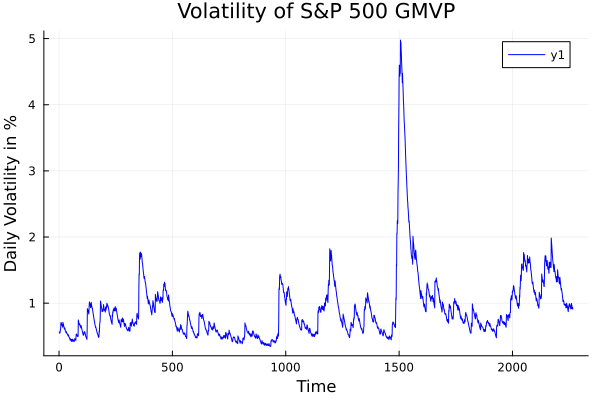

In [658]:
sigma=[];
for i in 1:2266
    vol=sqrt((1-lambda)*(sum(lambda_i.*sq_ret[i+1:i+ind_vol])))
    push!(sigma, vol)
end
plot(sigma*100, title="Volatility of S&P 500 GMVP", xaxis="Time", yaxis="Daily Volatility in %", color="Blue")

In [659]:
skip=1
vw_ret=[];
for i in 1:1:2265
    vol_return=portfolio_returns[ind_vol+skip+i].*sigma[end]./sigma[skip+i]
    push!(vw_ret, vol_return)
end
vw_ret

2265-element Vector{Any}:
  0.00654908449618345
 -0.005322535413261721
 -0.011247242235290278
 -0.012045612622765609
  0.014745348776977649
  0.010442704774475625
 -0.019421999369928368
 -0.012607919995423229
  0.007370443179591544
  0.0005591141246178934
  0.0068497189137563174
  0.006122831878260188
  0.012224239893734248
  ⋮
 -0.0003490825206736969
  0.008240861258563603
 -0.0027728731046721107
  0.010731481594406527
  0.007386420600334836
 -0.0169277811798491
  0.0040454873907326706
  0.008133718136669858
 -0.0038526804731758065
  0.00020328804036763977
  0.012018699245677373
  0.0042080846051432315

In [660]:
pvw_ret=vw_ret.*NA
sorted=sort(pvw_ret)
prob=0.01
ind=prob*(2518-ind_vol-skip)
high_ind=Int(round(ind))
low_ind=high_ind-1

avghigh=mean(sorted[high_ind,:])
avglow=mean(sorted[low_ind,:])
VAR=avglow*(high_ind-ind)/(high_ind-low_ind)+avghigh*(1-(high_ind-ind)/(high_ind-low_ind))
print("1% VAR for S&P 500 Portfolio using Vol Weighted: ", VAR)

1% VAR for S&P 500 Portfolio using Vol Weighted: -22664.6387393424

### Backtesting Volatility Weighted VaR

In [1152]:
function backtest_vol_var(returns, rolling_window_size, horizon, alpha, lambda)
    exceedings = 0
    first_index = 1
    number_of_returns = size(portfolio_returns)[1]
    
    while rolling_window_size<number_of_returns
        window_returns = returns[first_index:rolling_window_size]
        #### Insert risk measurement method here, label the risk measure 
        NA=1000000;
        ind_vol=Int64(round(size(window_returns)[1]/10))
        k=[];
        for i in reverse(1:ind_vol)
            i
            push!(k,i)
        end 
        sq_ret=window_returns.*window_returns;
        
        
        
        c=hcat(k, window_returns[1:ind_vol], sq_ret[1:ind_vol]);
        
        lambda_i=[];
        for i in reverse(1:ind_vol)
            lamb_i=lambda^(i-1)
            push!(lambda_i,lamb_i)
        end
        
        d=hcat(c[1:ind_vol,:], lambda_i);
        
        
        
        
        sigma=[];
        for i in 1:size(window_returns)[1]-ind_vol
            vol=sqrt((1-lambda)*(sum(lambda_i.*sq_ret[i+1:i+ind_vol])))
            push!(sigma, vol)
        end
        
        
        
        skip=1
        vw_ret=[];
        for i in 1:1:size(window_returns)[1]-ind_vol-1
            vol_return=window_returns[ind_vol+skip+i].*sigma[end]./sigma[skip+i]
            push!(vw_ret, vol_return)
        end
        
        
        
        pvw_ret=vw_ret.*NA
        sorted=sort(pvw_ret)
        prob=0.01
        ind=prob*(size(window_returns)[1]-ind_vol-skip)
        high_ind=Int(round(ind))
        low_ind=high_ind-1
        
        
        avghigh=mean(sorted[high_ind,:])
        avglow=mean(sorted[low_ind,:])
        risk_measure=avglow*(high_ind-ind)/(high_ind-low_ind)+avghigh*(1-(high_ind-ind)/(high_ind-low_ind))
        #print("1% VAR for S&P 500 Portfolio using Vol Weighted: ", risk_measure)
        
        
        ####
        
        # Check for exceeding
        #println(-risk_measure/NA)
        #println(returns[rolling_window_size+1])
        #if -risk_measure/NA < (returns[rolling_window_size+1])
        if    (returns[rolling_window_size+1])*NA < risk_measure 
            exceedings = exceedings+1
        end
        
        #Roll the window
        rolling_window_size = rolling_window_size + 1
        first_index = first_index + 1
    end
    return exceedings, number_of_returns
end;

In [1404]:
lambda=0.97;
alpha=0.01
ne,n = backtest_vol_var(portfolio_returns, rolling_window_size, horizon, alpha, lambda)

(17, 2518)

In [1405]:
p = binomial_probability(n,ne,alpha)*100

P = 0.0212320719
alpha = 0.05

Reject the null hypothesis


2.12320719

## Age Weighted VaR

In [664]:
days_old=[];
for i in reverse(1:2518)
    i
    push!(days_old,i)
end
c=hcat(days_old, portfolio_returns[1:2518,:]);
c

2518×2 Matrix{Any}:
 2518   0.00414492
 2517  -0.00620939
 2516   0.00460006
 2515  -0.00302437
 2514   0.00425617
 2513   0.00230379
 2512   0.00771029
 2511   0.00399798
 2510  -0.00672073
 2509  -0.0195465
 2508   0.0109698
 2507  -0.0179073
 2506  -0.00517163
    ⋮  
   12  -0.000361929
   11   0.00849441
   10  -0.00277883
    9   0.0108887
    8   0.00741362
    7  -0.0184932
    6   0.00431047
    5   0.00861033
    4  -0.00397552
    3   0.000203382
    2   0.012317
    1   0.00420808

In [665]:
lambda=0.99;
weight=[];
for i in 1:2518
    a=(lambda^(days_old[i].-1)*(1-lambda))/(1-(lambda^2518))
    push!(weight, a)
end

In [666]:
c=hcat(c, weight);
dfc=DataFrame(c, :auto);
sort_dfc=sort(dfc,:x2);
sort_dfc[:,:cumValue] = [sum(sort_dfc[1:i, :x3]) for i in 1:nrow(sort_dfc)];
sort_dfc

,x1,x2,x3,cumValue
,Any,Any,Any,Float64
1,767,-0.0900706,4.53481e-6,4.53481e-6
2,769,-0.0863219,4.44457e-6,8.97938e-6
3,772,-0.0646853,4.31256e-6,1.32919e-5
4,770,-0.0570894,4.40012e-6,1.76921e-5
5,763,-0.0533333,4.72083e-6,2.24129e-5
6,706,-0.0528845,8.37167e-6,3.07846e-5
7,779,-0.0493474,4.01959e-6,3.48041e-5
8,762,-0.0417818,4.76851e-6,3.95727e-5
9,218,-0.0410703,0.00112937,0.00116895


In [667]:
for i in 1:nrow(sort_dfc)
    if sort_dfc[i,:cumValue]>=0.01
        return(i)
        break 
    end
end

24

In [668]:
lower_var=sort_dfc[34, :x2];
higher_var=sort_dfc[33, :x2];

In [669]:
cum_l_var=sort_dfc[34, :cumValue];
cum_h_var=sort_dfc[33, :cumValue];

In [670]:
w_h=cum_l_var-0.01;
w_l=0.01-cum_h_var;
weight_h=w_h/(w_h+w_l);
weight_l=1-weight_h;

In [671]:
weighted_VAR=weight_h*higher_var + lower_var*weight_l
print("Age weighted S&P 500 GMVP 1% VAR :", weighted_VAR*NA)

Age weighted S&P 500 GMVP 1% VAR :-27475.576549024438

In [1158]:
function backtest_age_var(returns, rolling_window_size, horizon, alpha, lambda)
    exceedings = 0
    first_index = 1
    number_of_returns = size(portfolio_returns)[1]
    
    while rolling_window_size<number_of_returns
        window_returns = returns[first_index:rolling_window_size]
        
        #### Insert risk measurement method here, label the risk measure 
        NA=1000000;
        ind_vol=Int64(round(size(window_returns)[1]/10))
        
        days_old=[];
        for i in reverse(1:size(window_returns)[1])
            i
            push!(days_old,i)
        end
        c=hcat(days_old, window_returns[1:size(window_returns)[1],:]);
        
        weight=[];
        for i in 1:size(window_returns)[1]
            a=(lambda^(days_old[i].-1)*(1-lambda))/(1-(lambda^size(window_returns)[1]))
            push!(weight, a)
        end
        
        c=hcat(c, weight);
        dfc=DataFrame(c, :auto);
        sort_dfc=sort(dfc,:x2);
        sort_dfc[:,:cumValue] = [sum(sort_dfc[1:i, :x3]) for i in 1:nrow(sort_dfc)];
        
        set_index=2
        
        for i in 1:nrow(sort_dfc)
            if sort_dfc[i,:cumValue]>=0.01
                set_index = i
                break 
            end
        end
        
        if set_index == 1
            set_index=2
        end
        
        lower_var=sort_dfc[set_index, :x2];
        higher_var=sort_dfc[set_index-1, :x2];
        
        cum_l_var=sort_dfc[set_index, :cumValue];
        cum_h_var=sort_dfc[set_index-1, :cumValue];
        
        w_h=cum_l_var-0.01;
        w_l=0.01-cum_h_var;
        weight_h=w_h/(w_h+w_l);
        weight_l=1-weight_h;
        
        risk_measure=weight_h*higher_var + lower_var*weight_l
        
        ########
        #println(-risk_measure)
        #println(returns[rolling_window_size+1])
        if (returns[rolling_window_size+1]) < risk_measure 
            exceedings = exceedings+1
        end
        
        #Roll the window
        rolling_window_size = rolling_window_size + 1
        first_index = first_index + 1
    end
    return exceedings, number_of_returns
end;

In [1406]:
lambda=0.85;
alpha=0.01
ne,n = backtest_age_var(portfolio_returns, rolling_window_size, horizon, alpha, lambda)

(55, 2518)

In [1407]:
p = binomial_probability(n,ne,alpha)*100

P = 8.83e-8
alpha = 0.05

Reject the null hypothesis


8.83e-6